In [1]:
%cd ../..

c:\Boyko Boev\Stock-Market-Prediction\src


In [2]:
from cnn_model import build_model, train_model, save_cnn_model, load_cnn_model
from models.cnn_v2.cnn_normalize import get_cnn_data
from utils.chart import config_chart, plot_model_performance, plot_scatter_data, plot_distribution_data, plot_direction_comparison
from constants import SP500_TICKER
# import tensorflow as tf


---

## For **build_model** function

In [3]:
model = build_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 7, 16)               │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 7, 16)               │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 112)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             113 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

---

## For **train_model** function

In [4]:
train, test, predict= get_cnn_data(SP500_TICKER)

x_train = train["x"] 
y_train = train["y"]

x_test = test["x"]
y_test = test["y"]

x_predict = predict["x"]
y_predict = predict["y"]


print("Train data:")
print(x_train[0])
print(x_train.shape)
print(y_train[0])
print(y_train.shape)

print("Test data:")
print(y_test[0])
print(x_test.shape)
print(x_test[0])
print(x_test.shape)

print("Predict data:")
print(x_predict[0])
print(x_predict.shape)
print(y_predict[0])
print(y_predict.shape)

Train data:
[5.75737773e-01 6.51096995e-01 6.46200955e-01 1.00000000e+00
 0.00000000e+00 2.02698221e-01 1.11028366e-04]
(4830, 7)
1.0
(4830,)
Test data:
0.0
(604, 7)
[0.60569267 0.72578367 0.74099882 1.         1.         0.0413437
 0.01735969]
(604, 7)
Predict data:
[0.58551967 0.73047767 0.74710533 1.         0.         0.06462555
 0.03338704]
(604, 7)
0.0
(604,)


In [5]:
# plt = config_chart('Model Data')
# plt.plot(y_dates_train[:, 0], y_train[:, 0])
# plt.plot(y_dates_test[:, 0], y_test[:, 0])
# plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
# plt.legend(['Train', 'Test','Predict'])

Epoch 1/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4831 - loss: 0.3479 - mean_absolute_error: 0.5153
Epoch 2/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5324 - loss: 0.2500 - mean_absolute_error: 0.4967
Epoch 3/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5217 - loss: 0.2496 - mean_absolute_error: 0.4977
Epoch 4/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5210 - loss: 0.2500 - mean_absolute_error: 0.4983
Epoch 5/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5311 - loss: 0.2491 - mean_absolute_error: 0.4971
Epoch 6/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5368 - loss: 0.2483 - mean_absolute_error: 0.4955
Epoch 7/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5272 - loss: 0.2494 - mean_absolute_error: 0.4978
Epoch 8/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5251 - loss: 0.2488 - mean_absolute_error: 0.4964
Epoch 9/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

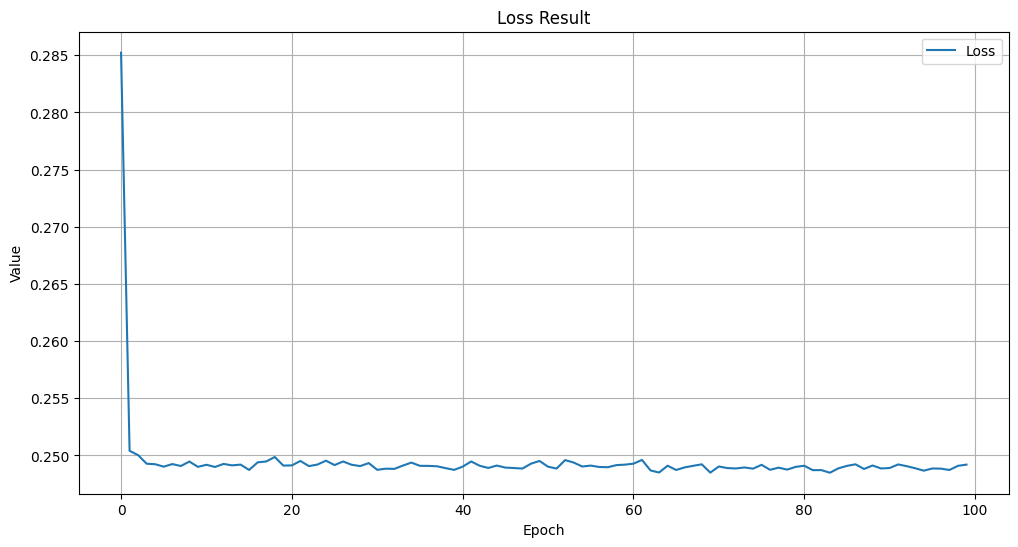

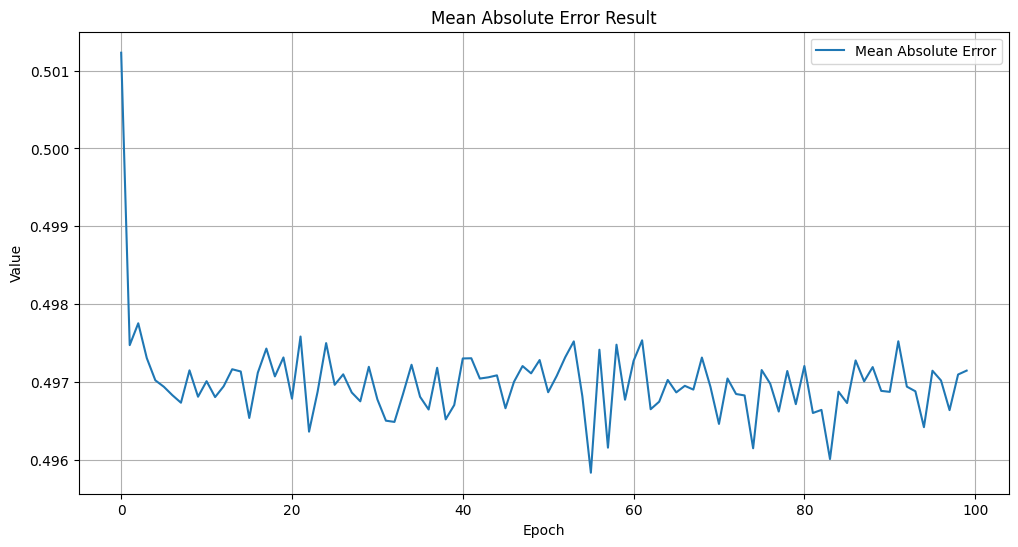

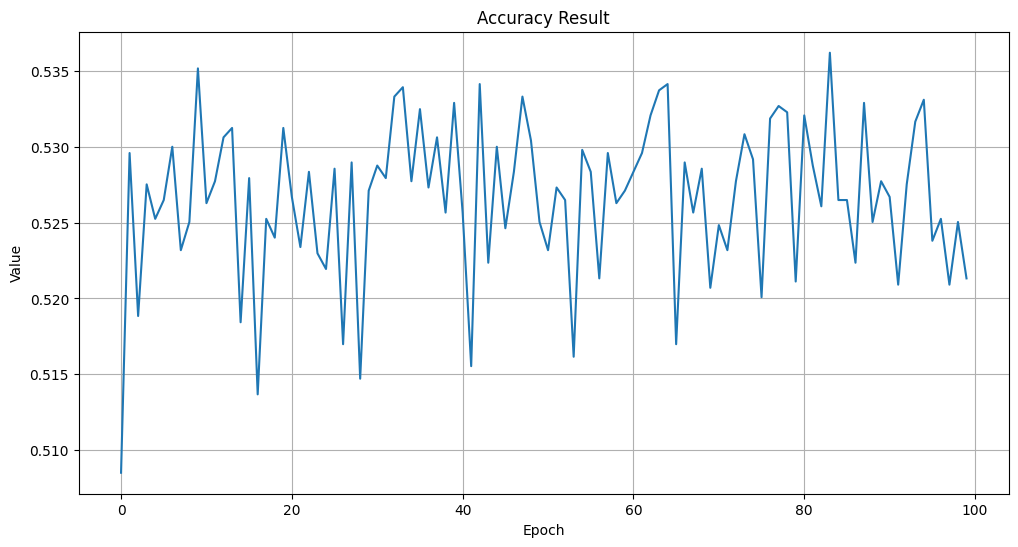

Train result:
Test result:
[0.24852627515792847, 0.5331125855445862, 0.4979144036769867]


In [6]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test) 

plot_model_performance(fit_result)
# plot_model_performance(evaluate_result)

print("Train result:")
print(fit_result)

print("Test result:")
print(evaluate_result)

save_cnn_model(model)

In [7]:
latest_train_metrics = [value[-1] for key, value in fit_result.history.items()]

print("Train result:")
print("accuracy, loss, precision, recall")
print(latest_train_metrics)

print("Test result:")
print("loss, accuracy, precision, recall")
print(evaluate_result)

Train result:
accuracy, loss, precision, recall
[0.5213250517845154, 0.2492019236087799, 0.49714553356170654]
Test result:
loss, accuracy, precision, recall
[0.24852627515792847, 0.5331125855445862, 0.4979144036769867]


In [8]:
model = load_cnn_model()

 82/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


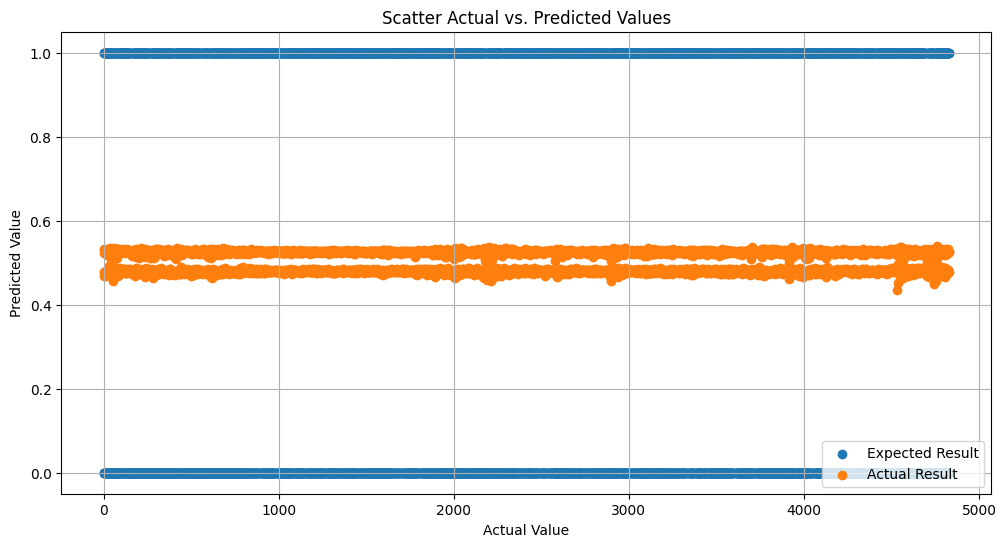

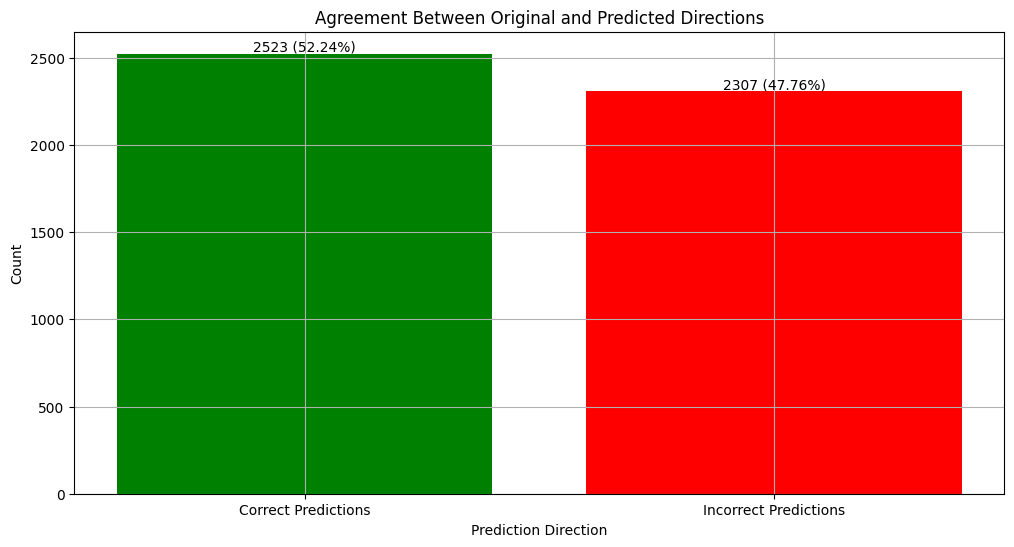

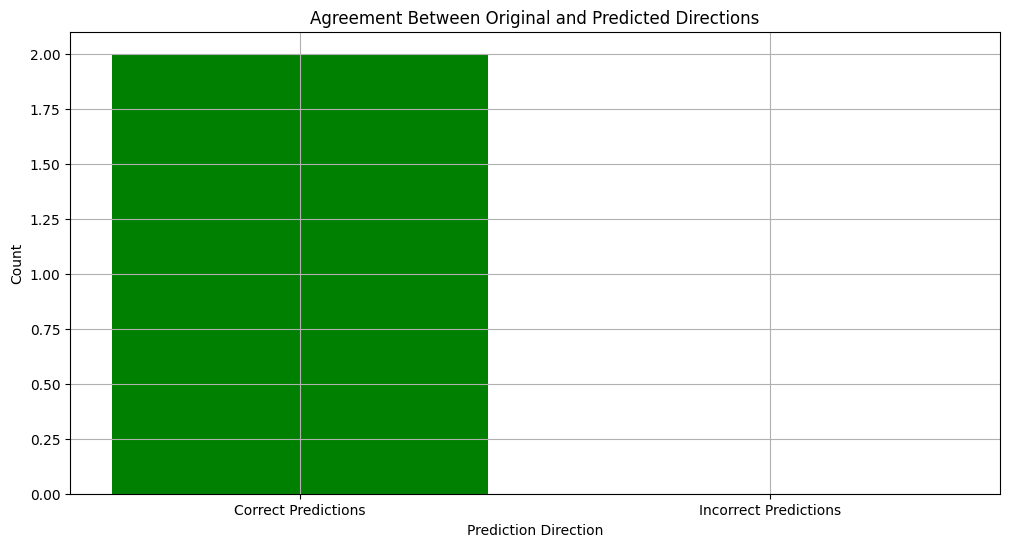

In [9]:
predictions_train = model.predict(x_train)

plot_scatter_data(y_train, predictions_train)
plot_direction_comparison(y_train, predictions_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


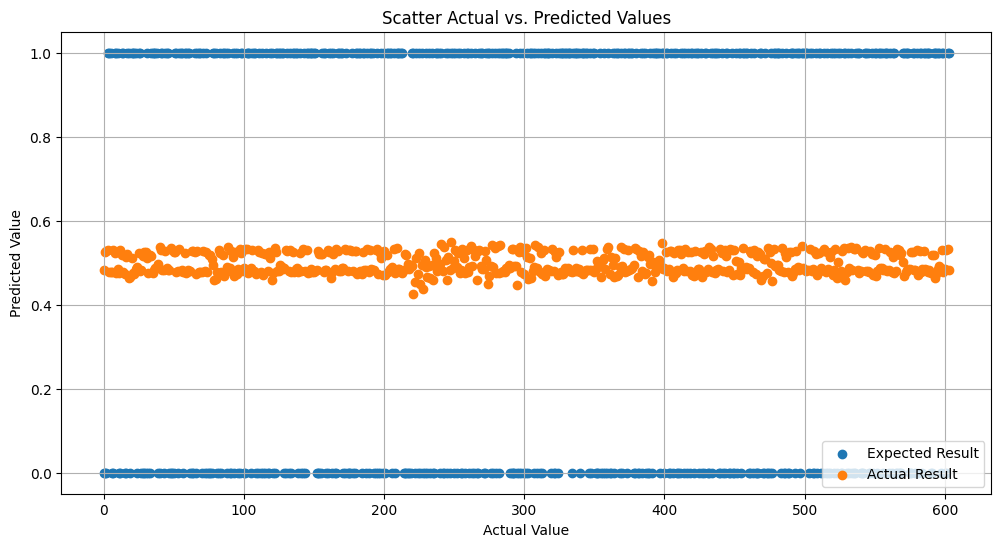

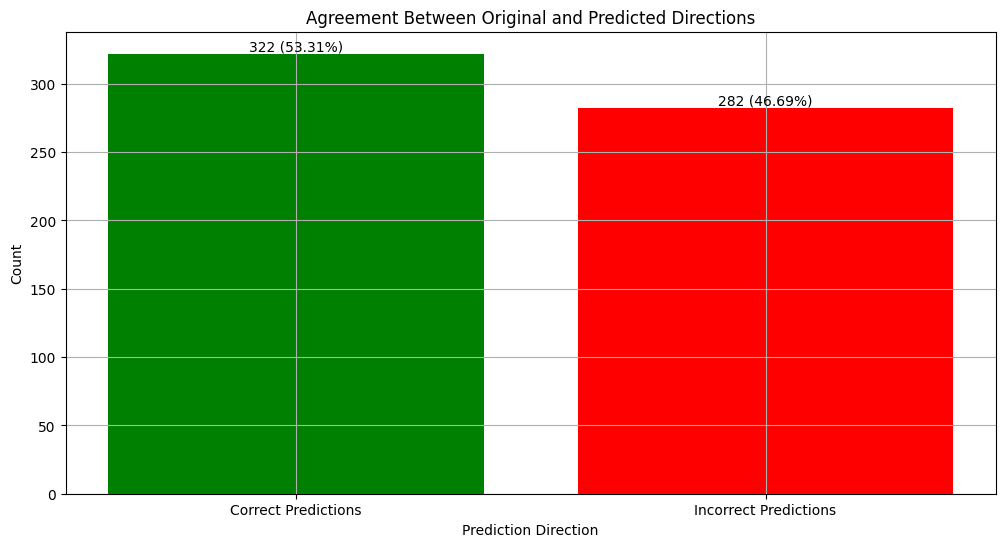

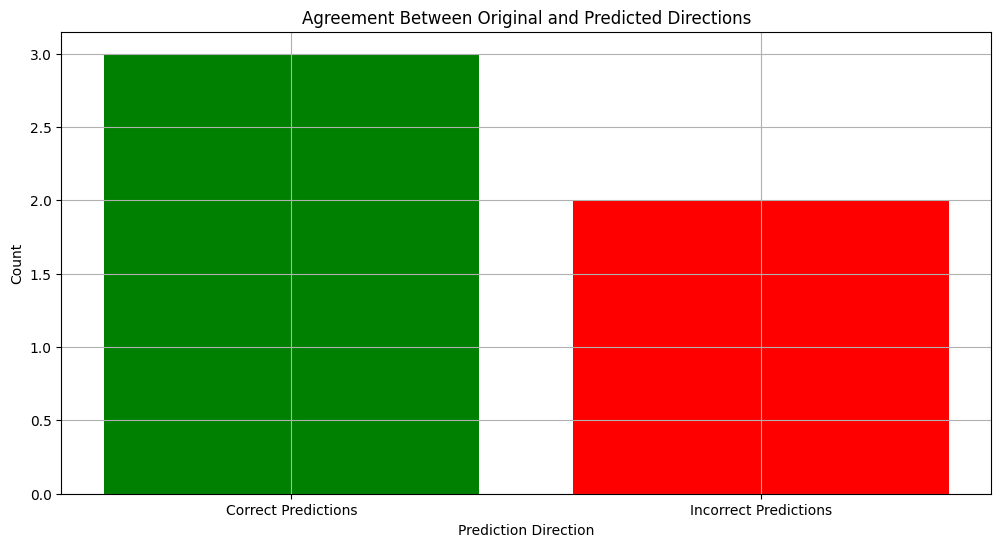

In [10]:
predictions_test = model.predict(x_test)

plot_scatter_data(y_test, predictions_test)
plot_direction_comparison(y_test, predictions_test)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


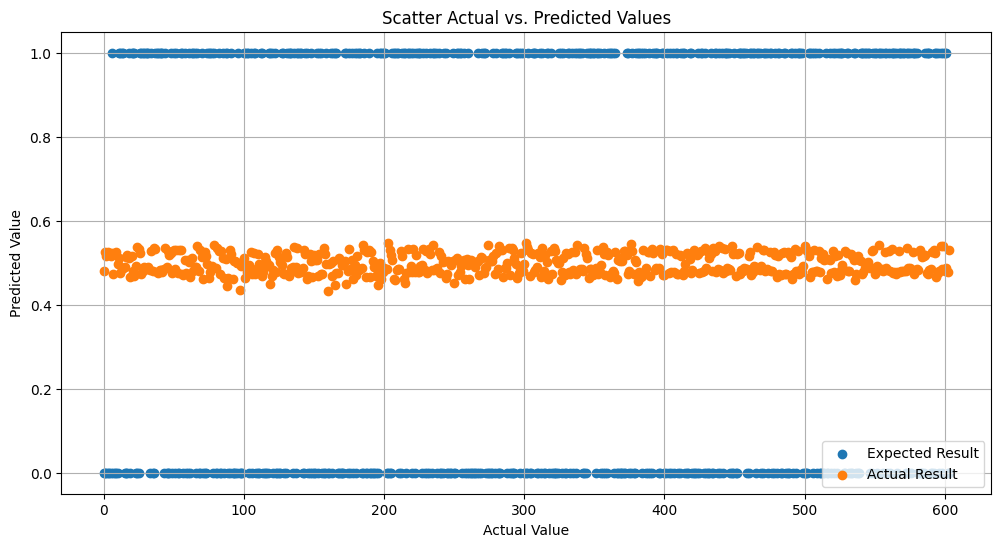

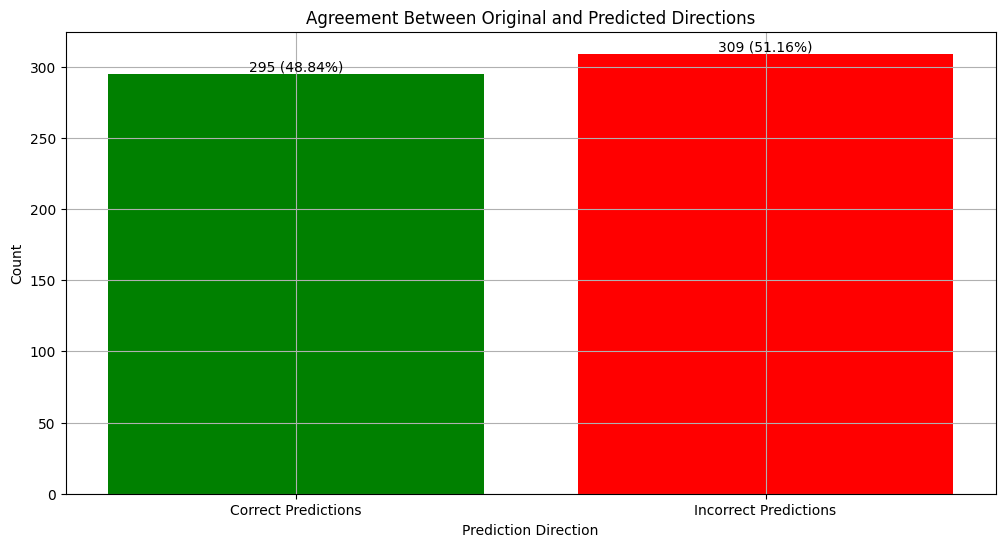

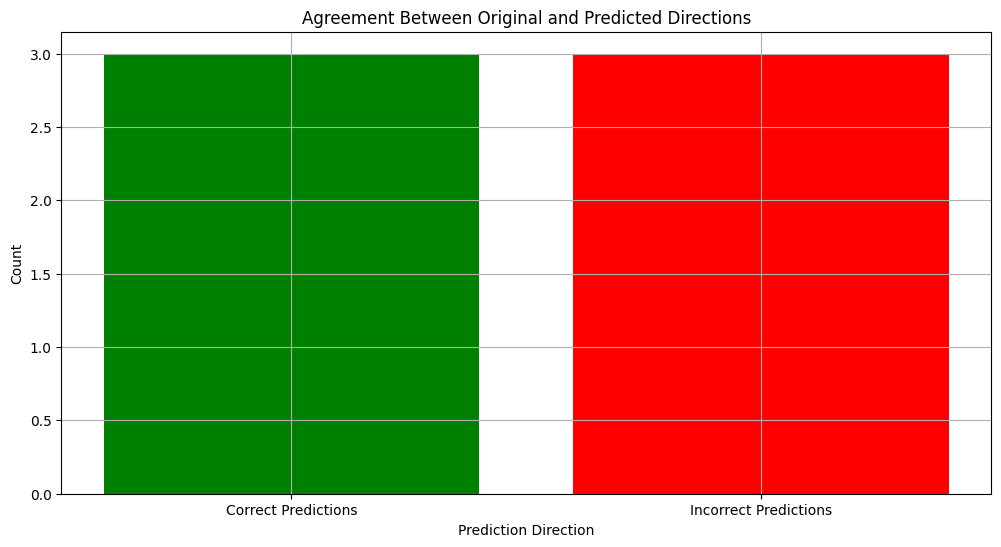

In [11]:
predictions = model.predict(x_predict)

predictions = predictions

plot_scatter_data(y_predict, predictions)
plot_direction_comparison(y_predict, predictions)